In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
Pkl_Filename = "ITC_Model.pkl"
sc_file= "ITC_sc.pkl"
global sc
with open(Pkl_Filename, 'rb') as file:  
    regressor = pickle.load(file)

with open(sc_file, 'rb') as file:  
    sc = pickle.load(file)

Using TensorFlow backend.


In [122]:
df = pd.read_csv(S+".csv",index_col="Date",parse_dates=True)


In [123]:
train_days= 60
df= df[['Open']]

In [124]:

df= df[-train_days:]

In [109]:
testing_df= sc.transform(df)

In [110]:
X_test = []
y_test = []
for i in range(len(testing_df)-9, len(testing_df)-4):
    X_test.append(testing_df[i-60:i])
#     y_test.append(testing_df[i+4, 0])
X_test = np.array(X_test)
# X_test = []
# X_test.append(testing_df[-train_days:])
# X_test = np.array(X_test)

In [111]:
X_test.shape

(5, 60, 1)

In [112]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [113]:
predicted_stock_price = regressor.predict(X_test)

In [114]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [118]:
predicted_stock_price=np.array(predicted_stock_price)

In [125]:
df3=pd.DataFrame(predicted_stock_price)

In [61]:
data=df[-1:]

In [80]:
df2=pd.read_csv(S+".csv",parse_dates=True)
s=df2.iloc[-1:,[0]]

In [81]:
s

,Date
2461,2020-10-26


In [90]:
result=s.to_string(index=False)

In [92]:
result=result[-10:]

In [93]:
result

'2020-10-26'

In [94]:
index_ = pd.date_range(result, periods = 6, freq ='D')
index_= index_[-5:]
index_

DatetimeIndex(['2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30',
               '2020-10-31'],
              dtype='datetime64[ns]', freq='D')

In [126]:
df3

,0
0,172.403809
1,172.919937
2,172.424881
3,170.925644
4,169.507645


In [149]:
df3.set_index(index_,inplace=True, drop = False)

In [150]:
df3

,0
2020-10-27,172.403809
2020-10-28,172.919937
2020-10-29,172.424881
2020-10-30,170.925644
2020-10-31,169.507645


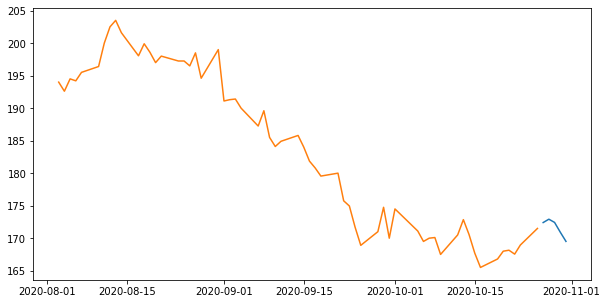

In [153]:
plt.figure(figsize=(10,5))
plt.plot(df3)
plt.plot(df)

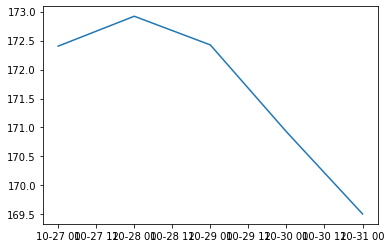

In [154]:
plt.plot(df3)